In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys; sys.path.insert(0, '../')
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import mne

from invert.forward import get_info, create_forward_model
from invert.util import pos_from_forward
pp = dict(surface='inflated', hemi='both', clim=dict(kind="percent", pos_lims=(0, 99, 100)), colorbar=False, verbose=0)

In [2]:
info = get_info(kind='biosemi64')
fwd = create_forward_model(info=info, sampling='ico3')
pos = pos_from_forward(fwd)
leadfield = fwd["sol"]["data"]
n_chans, n_dipoles = leadfield.shape
source_model = fwd['src']
vertices = [source_model[0]['vertno'], source_model[1]['vertno']]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


# Simulate

In [ ]:
from invert.solvers.esinet import generator

sim_params = dict(
    use_cov=False, 
    return_mask=False, 
    batch_repetitions=1,
    batch_size=1,
    n_sources=1, 
    n_orders=(2, 3), 
    snr_range=(100, 101), 
    n_timecourses=1,
    scale_data=False)
    

gen = generator(fwd, **sim_params)
x, y = gen.__next__()

tmin = 0
tstep = 1/info["sfreq"]
subject = "fsaverage"
evoked = mne.EvokedArray(x[0].T, info, tmin=tmin)
stc = mne.SourceEstimate(y[0].T, vertices, tmin=tmin, tstep=tstep, 
                        subject=subject, verbose=0)


In [30]:
brain = stc.plot(**pp, brain_kwargs=dict(title="Ground Truth"))
brain.add_text(0.1, 0.9, "Ground Truth", 'title', font_size=16)

ValueError: Neither input subject subject nor class subject attribute was a string

In [27]:
# evoked.save("../figures/solver_gallery/evoked-ave.fif")
# stc.save("../figures/solver_gallery/source")

Writing STC to disk...
[done]


# Load Evoked

In [3]:
evoked = mne.read_evokeds("../figures/solver_gallery/evoked-ave.fif")[0]
stc = mne.read_source_estimate("../figures/solver_gallery/source-lh.stc")

Reading c:\Users\Lukas\Documents\projects\invert\dev\..\figures\solver_gallery\evoked-ave.fif ...
    Found the data of interest:
        t =       0.00 ...      19.00 ms (No comment)
        0 CTF compensation matrices available
        nave = 1 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied


No projector specified for this dataset. Please consider the method self.add_proj.


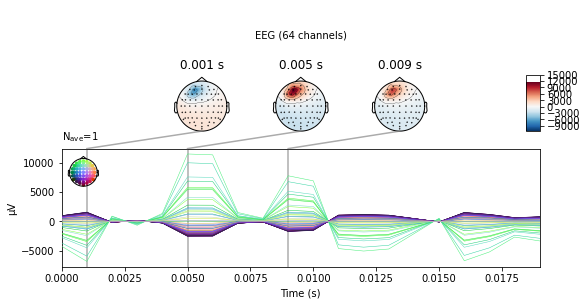

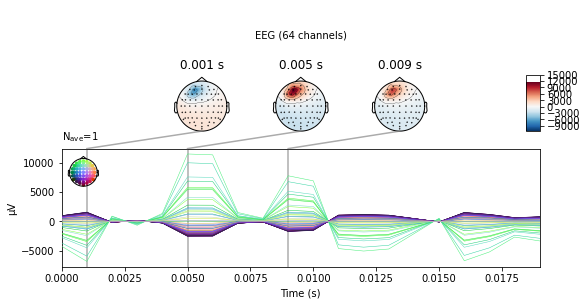

In [4]:
evoked.plot_joint()

# Plot Ground Truth and Inverse Solutions

In [5]:
%matplotlib inline
from invert import Solver
from invert.config import all_solvers

# Plot Ground Truth
stc.data /= abs(stc.data[:, 0]).max()
clim = dict(kind="values", pos_lims=(0., 0.5, 1))
pp["clim"] = clim
brain = stc.plot(**pp, subject="fsaverage", brain_kwargs=dict(title="Ground Truth"))
brain.add_text(0.1, 0.9, "Ground Truth", 'title', font_size=16)
img = brain.screenshot()
brain.close()

plt.figure()
plt.imshow(img)
plt.axis("off")
fname = f"../figures/solver_gallery/GroundTruth"
plt.savefig(fname, dpi=150)
plt.close()
all_solvers = ["HS Champagne", ]
# Plot Source Estimates
for solver_name in all_solvers:
    solver = Solver(solver_name)
    solver.make_inverse_operator(fwd, evoked, alpha="auto", update_noise=False)
    stc_ = solver.apply_inverse_operator(evoked)
    stc_.data /= abs(stc_.data[:, 0]).max()
    clim = dict(kind="values", pos_lims=(0., 0.5, 1))
    pp["clim"] = clim
    brain = stc_.plot(**pp, subject="fsaverage", brain_kwargs=dict(title=solver.name))
    brain.add_text(0.1, 0.9, solver.name, 'title', font_size=16)
    img = brain.screenshot()
    # brain.close()
    
    fig = plt.figure()
    plt.imshow(img)
    plt.axis("off")

    fname = f"""../figures/solver_gallery/{solver.name.replace(" ", "")}"""
    plt.savefig(fname, dpi=150)
    plt.close()

4.853792826008029
4.808432082048428
2.92336382510158
1.3063812589256898
0.40813629259148954
0.29109004434867214
0.235468422214982
0.20608327120737258
0.18635151395995564
0.15157995127002977
0.1237232289515573
0.1203419344284482
0.10718828810738823
0.09002593142568038
0.0729335062156129
0.05759801768688
0.044601878442156906
0.03404424851943544
0.02574220345972611
0.01936672863718547
0.01454856041104824
0.010942749598251034
0.010518510911212697
0.010395655652395586
0.010294827859535782
0.010195639212701835
0.010080819500375038
0.00993836376984697
0.009762066105205136
0.00955104242017557
0.009380150807654586
0.009351143609023116
0.009284322470478612
0.009189924198794663
0.009077878726002797
0.008957330744300607
0.00883627698300532
0.008721321400515347
0.009305956202738386
0.010489989876634465
0.011769094948487699
0.01313326683805767
0.014566243785435487
0.01604441523901874
0.01753590997873916
0.019000056726599046
0.02038746947672193
0.021641061158193448
0.02269830895212019
0.0234950445966

# Solve

In [ ]:
# from invert import Solver
# solver = Solver("lstm")
# solver.make_inverse_operator(fwd, evoked, alpha="auto")
stc_ = solver.apply_inverse_operator(evoked)

stc_.data /= abs(stc_.data).max()
brain = stc_.plot(**pp)
brain.add_text(0.1, 0.9, solver.name, 'title',
               font_size=14)

evoked_ = mne.EvokedArray(fwd["sol"]["data"] @ stc_.data, info).set_eeg_reference("average", projection=True)
evoked_.plot_joint()

print("r = ", pearsonr(abs(stc.data).mean(axis=-1), abs(stc_.data).mean(axis=-1))[0])
print("L1 = ",  np.linalg.norm(stc_.data, ord=1))

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
r =  0.19636086828602
L1 =  20.113617


Using control points [0.0476362  0.05874738 0.41511153]
Using control points [0.0476362  0.05874738 0.41511153]
Using control points [0.0476362  0.05874738 0.41511153]
Using control points [0.0476362  0.05874738 0.41511153]
Using control points [0.01255137 0.10915932 0.70373472]
Using control points [0.01255137 0.10915932 0.70373472]
Using control points [0.02688973 0.03550795 0.22265582]
Using control points [0.01029644 0.04761037 0.63900793]
Using control points [0.02688973 0.03550795 0.22265582]
